<a href="https://colab.research.google.com/github/youjuny/Data-test/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98_%EA%B8%B0%EC%B4%88%ED%85%8C%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
# 관련 라이브러리 로드
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [96]:
# 학습용 데이터와 테스트용 데이터 준비
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [97]:
# 데이터의 개수 및 내용 확인
print(train_images.shape)
print(train_labels.shape)
print(train_labels)


(60000, 28, 28)
(60000,)
[9 0 0 ... 3 0 5]


In [98]:
# 각 레이블의 클래스명을 찾기 위한 배열 생성
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [99]:
# 레이블 3은 Dress임을 확인
class_names[3]

'Dress'

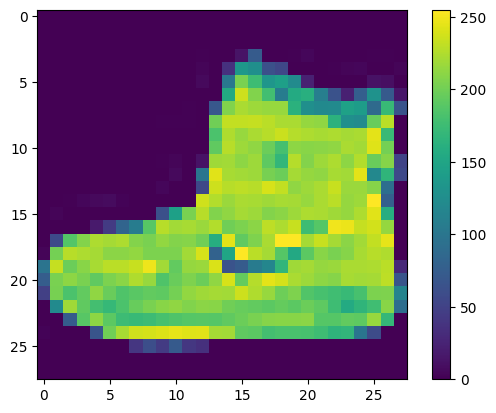

In [100]:
# train_images의 첫번째 데이터를 직접 이미지로 출력하기
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [101]:
# 문제1.
# 학습 속도와 성능을 높이기 위해 정규화 하기
from sklearn.preprocessing import StandardScaler

train_images = StandardScaler().fit_transform(train_images.reshape(-1, 28*28)).reshape(-1, 28, 28)
test_images = StandardScaler().fit_transform(test_images.reshape(-1, 28*28)).reshape(-1, 28, 28)

In [103]:
#문제2.
# 다음과 같은 층으로 구성된 모델을 구성해주세요.
# 입력층((28, 28))
# 은닉층 - 300개, 활성함수 relu
# 출력층(10)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(300, activation='relu'),  # 은닉층
    tf.keras.layers.Dense(10, activation='softmax')  # 출력층
])

In [84]:
# 모델 세부 정보 세팅
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [85]:
#문제3.
#데이터를 이용해 모델 학습시키기(epochs는 5회)
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 12s 6ms/step - loss: 0.4582 - accuracy: 0.8429
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3391 - accuracy: 0.8783
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3036 - accuracy: 0.8905
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2786 - accuracy: 0.8995
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2558 - accuracy: 0.9068


In [86]:
# 학습된 모델의 정확도 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3943 - accuracy: 0.8715 - 924ms/epoch - 3ms/step

Test accuracy: 0.8715000152587891


In [87]:
# 학습된 모델의 결과를 확률로 볼수 있도록 설정
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [88]:
# 표기법을 보기 쉽게 소수점 표기법으로 바꿈
import numpy as np

 # 과학적 표기법 대신 소수점 6자리까지 나타낸다.
np.set_printoptions(precision=6, suppress=True)

predictions

array([[0.085392, 0.085392, 0.085392, ..., 0.085768, 0.085392, 0.231091],
       [0.085344, 0.085343, 0.231866, ..., 0.085343, 0.085343, 0.085343],
       [0.085337, 0.231969, 0.085337, ..., 0.085337, 0.085337, 0.085337],
       ...,
       [0.085365, 0.085342, 0.085342, ..., 0.085342, 0.231891, 0.085342],
       [0.085337, 0.231969, 0.085337, ..., 0.085337, 0.085337, 0.085337],
       [0.085914, 0.085914, 0.085915, ..., 0.089885, 0.086138, 0.08592 ]],
      dtype=float32)

In [89]:
# 예측 결과 10개중 가장 높은 확률의 레이블을 뽑는 법
np.argmax(predictions[0])

9

In [90]:
import matplotlib.pyplot as plt

In [91]:
# 문제4.
# 테스트 데이터의 0번째 이미지를 모델에게 예측하게 하여 그 결과를 출력해주세요.
img = np.expand_dims(test_images[0], axis=0)
prediction_single = probability_model.predict(img)
print(class_names[np.argmax(prediction_single)])

1/1 [==============================] - 0s 26ms/step
Ankle boot


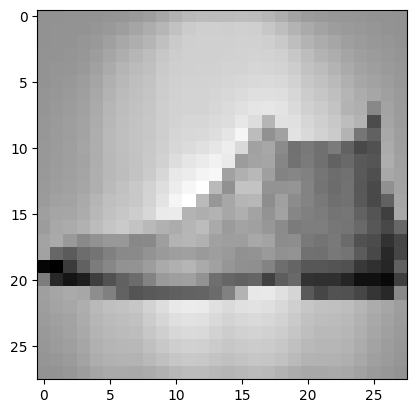

In [92]:
plt.figure()
plt.imshow(test_images[0], cmap=plt.cm.binary)

In [93]:
# 문제5.
# 테스트 데이터의 100번째 이미지를 모델에게 예측하게 하여 그 결과를 출력해주세요.
img = np.expand_dims(test_images[100], axis=0)
prediction_single = probability_model.predict(img)
print(class_names[np.argmax(prediction_single)])

1/1 [==============================] - 0s 25ms/step
Dress


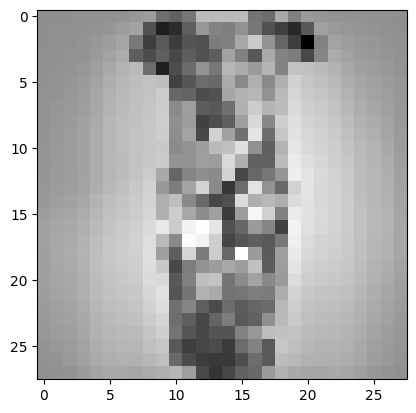

In [94]:
plt.figure()
plt.imshow(test_images[100], cmap=plt.cm.binary)
